In [42]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")



In [43]:
# Load dataset
df = pd.read_csv("../data/data.csv")
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [44]:
# Add BMI_Class column
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Class"] = df["BMI"].apply(classify_bmi)
df = df.drop(columns=["BMI"])
df["BMI_Class"].value_counts()


BMI_Class
Normal         370
Overweight     243
Obese          192
Underweight    168
Name: count, dtype: int64

Define a function to classify BMI into categories.
Apply the function to create a new column BMI_Class.
Drop the original BMI column from the dataframe.
Count and display the number of records in each BMI category.

In [45]:
# One-hot encode categorical variables
categorical_cols = ["Gender", "Workout_Type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable
label_encoder = LabelEncoder()
df["BMI_Class_Encoded"] = label_encoder.fit_transform(df["BMI_Class"])


In [46]:
# Define selected features
selected_features = ['Weight (kg)', 'Height (m)', 'Experience_Level', 'Gender_Male']
X = df[selected_features]
y = df["BMI_Class_Encoded"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
# Preview first few rows of selected features + target
print(df[selected_features + ['BMI_Class_Encoded']].head())

# Summary statistics of selected features
print(df[selected_features].describe())


   Weight (kg)  Height (m)  Experience_Level  Gender_Male  BMI_Class_Encoded
0         88.3        1.71                 3         True                  1
1         74.9        1.53                 2        False                  1
2         68.1        1.66                 2        False                  0
3         53.2        1.70                 1         True                  3
4         46.1        1.79                 1         True                  3
       Weight (kg)  Height (m)  Experience_Level
count   973.000000   973.00000        973.000000
mean     73.854676     1.72258          1.809866
std      21.207500     0.12772          0.739693
min      40.000000     1.50000          1.000000
25%      58.100000     1.62000          1.000000
50%      70.000000     1.71000          2.000000
75%      86.000000     1.80000          2.000000
max     129.900000     2.00000          3.000000


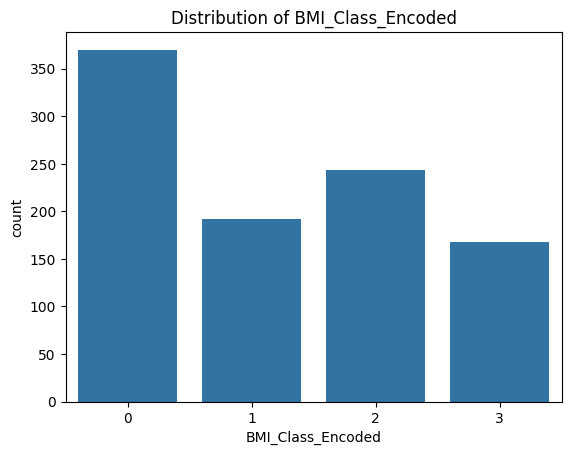

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='BMI_Class_Encoded', data=df)
plt.title("Distribution of BMI_Class_Encoded")
plt.show()


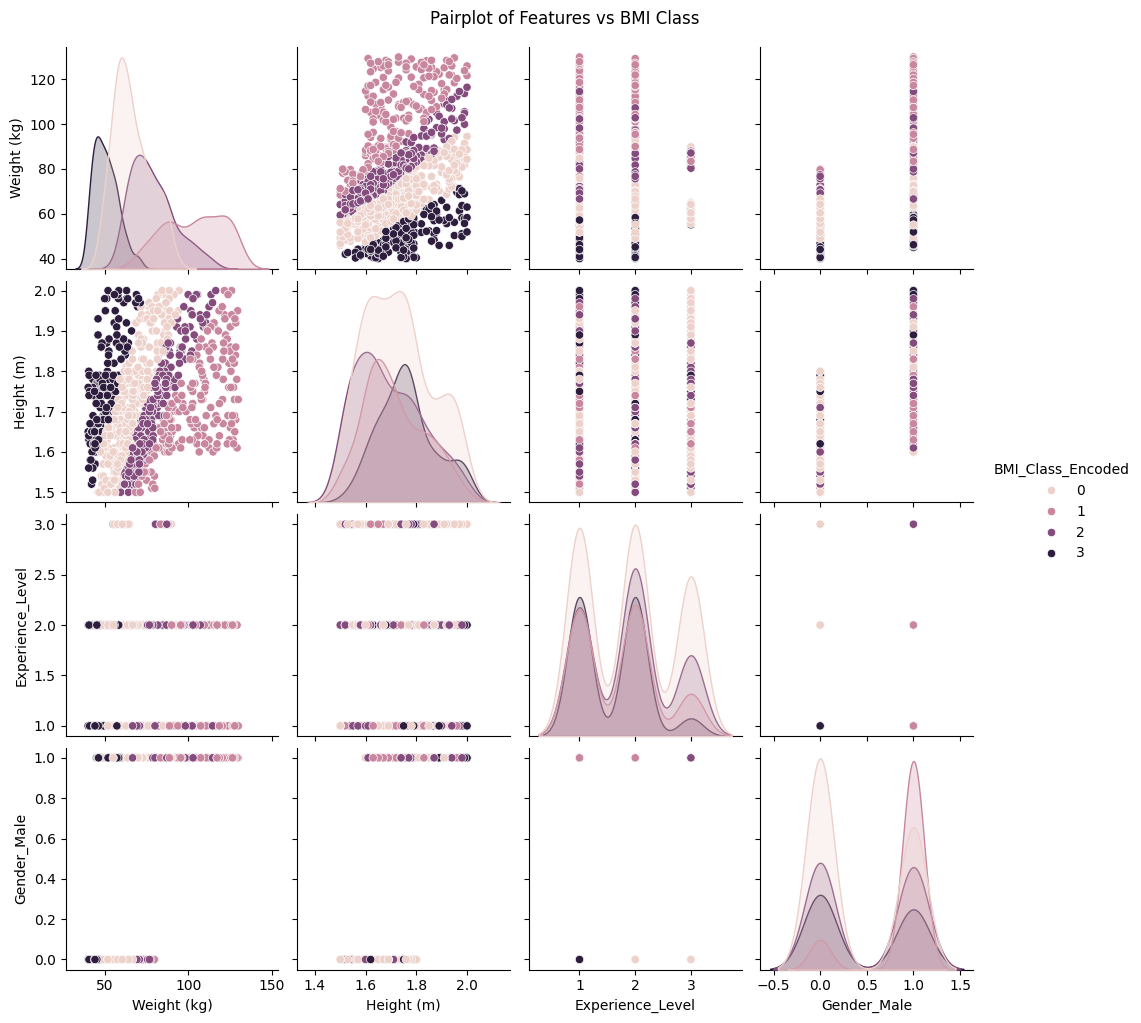

In [49]:
sns.pairplot(df[selected_features + ['BMI_Class_Encoded']], hue='BMI_Class_Encoded')
plt.suptitle("Pairplot of Features vs BMI Class", y=1.02)
plt.show()


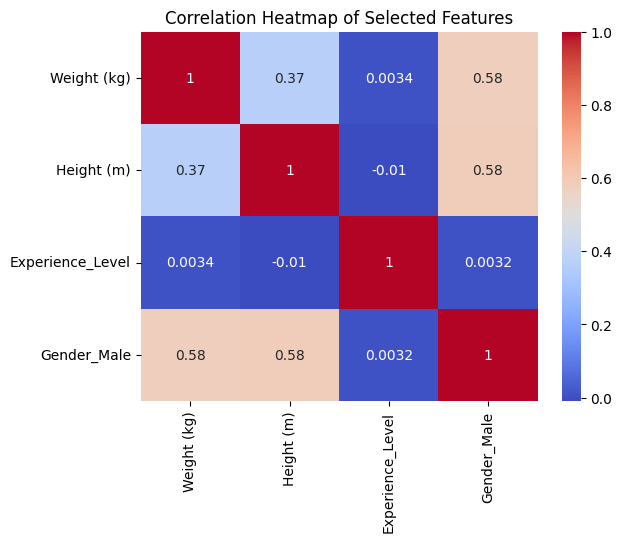

In [50]:
corr = df[selected_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features")
plt.show()


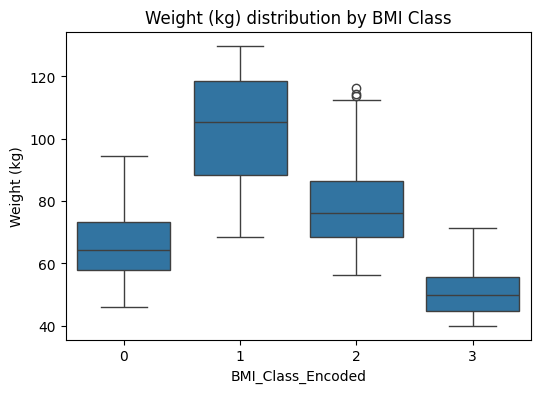

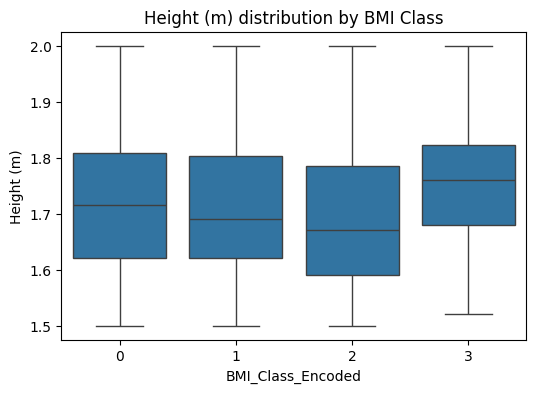

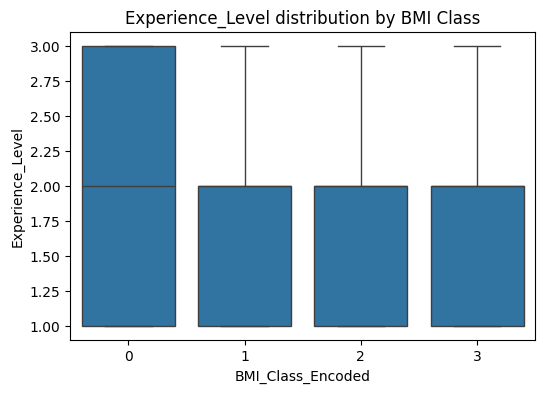

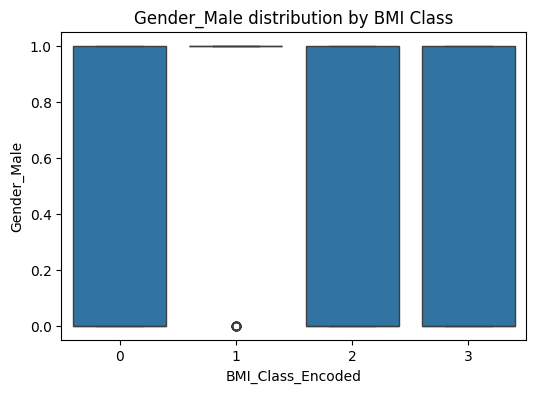

In [51]:
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='BMI_Class_Encoded', y=feature, data=df)
    plt.title(f"{feature} distribution by BMI Class")
    plt.show()


In [52]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


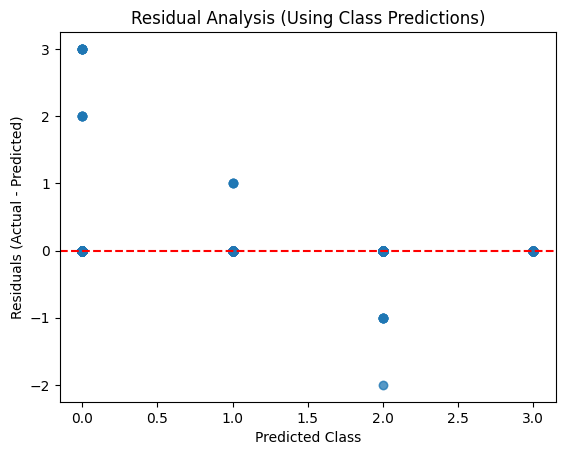

In [53]:
# Train Logistic Regression model
from matplotlib import pyplot as plt


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
residuals = y_train - y_train_pred

plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Class')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis (Using Class Predictions)')
plt.show()




In [54]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy Scores
print(f"✅ Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"✅ Testing Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")


✅ Training Accuracy: 0.9451
✅ Testing Accuracy:  0.9590


In [55]:
# Classification Report
print("📊 Classification Report (Test):")
print(classification_report(
    label_encoder.inverse_transform(y_test),
    label_encoder.inverse_transform(y_test_pred)
))


📊 Classification Report (Test):
              precision    recall  f1-score   support

      Normal       0.95      1.00      0.98        84
       Obese       0.98      0.90      0.94        51
  Overweight       0.93      0.97      0.95        65
 Underweight       1.00      0.93      0.96        44

    accuracy                           0.96       244
   macro avg       0.96      0.95      0.96       244
weighted avg       0.96      0.96      0.96       244



In [56]:
# Cross-Validation Accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"📈 Cross-Validation Accuracy (CV=5): {cv_scores.mean():.4f}")


📈 Cross-Validation Accuracy (CV=5): 0.9466


In [57]:
import joblib

# Save the trained model, scaler, and label encoder
joblib.dump(model, "../models/bmi/bmi_model.pkl")
joblib.dump(scaler, "../models/bmi/bmi_scaler.pkl")
joblib.dump(label_encoder, "../models/bmi/bmi_label_encoder.pkl")


['../models/bmi/bmi_label_encoder.pkl']

In [58]:
# Load the saved model and scaler
loaded_model = joblib.load("../models/bmi/bmi_model.pkl")
loaded_scaler = joblib.load("../models/bmi/bmi_scaler.pkl")

# Purposeful test samples (diverse profiles)
test_samples = np.array([
    [45, 1.50, 1, 0],  # Very light female, beginner, short height
    [110, 1.90, 5, 1], # Very heavy male, expert, tall height
    [65, 1.65, 2, 0],  # Average female, low experience
    [85, 1.75, 3, 1],  # Heavy male, medium experience
    [55, 1.80, 4, 0],  # Slim female, experienced, tall height
])

# Scale the test samples using loaded scaler
test_samples_scaled = loaded_scaler.transform(test_samples)

# Predict using loaded model
predictions_encoded = loaded_model.predict(test_samples_scaled)
predictions = label_encoder.inverse_transform(predictions_encoded)

# Show test samples with their predicted classes
for i, sample in enumerate(test_samples):
    print(f"Test sample {i+1}: Features={sample} -> Predicted BMI_Class: {predictions[i]}")

Test sample 1: Features=[45.   1.5  1.   0. ] -> Predicted BMI_Class: Normal
Test sample 2: Features=[110.    1.9   5.    1. ] -> Predicted BMI_Class: Obese
Test sample 3: Features=[65.    1.65  2.    0.  ] -> Predicted BMI_Class: Normal
Test sample 4: Features=[85.    1.75  3.    1.  ] -> Predicted BMI_Class: Overweight
Test sample 5: Features=[55.   1.8  4.   0. ] -> Predicted BMI_Class: Underweight
